# Correction Python part of the Exo3:

## Exercise 3 — Global Warming

Get the data in the “BerkeleyEarth GlobalLandTemperature.dat” from the github notebook data directory. 

The objective of the exercise is to measure the weighted mean temperature per bin of 10 years.

To do so, do the following:

1. Create a function to read the data. 
   **Hint**: Check the concatenation list made for second exercise correction (when opening the flower data.).

2. Plot the data. 
   **Hint**: Look at the errorbar (or fill between) methods of matplotlib (similar to plot).

3. Create a weighted mean method that will measure the weighted mean and its associated error.

4. Plot the evolution of the temperature base on this weighted mean data.


Data must be displayed with their errors.

In [1]:
# ==  Basic import == #
# plot within the notebook
%matplotlib inline
# No annoying warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np

# Global Warming data

Data from Berekeley Earth.

### 1 Create a function to read the data


In [66]:
def read_data(datafile, ignore="#", parser=None, dtype="float"):
    """ function reading and parsing the file
    
    Parameters
    ----------
    datafile: [string]
        location of the file you aim to read.
        
    ignore: [sting] -optional-
        lines starting by this *unique* character will be ignored
        
    parser: [string] -optional-
        character spliting the columns. Set None if the separated value is a space.
        
    dtype: [string] -optional-
        type of data you expect. If several, say 'object'
        
    Returns
    -------
    Array
    """
    if len(ignore)>1:
        raise ValueError("ignore must be a single-string character; %s given"%ignore)
        
    return np.asarray([d.split(parser) for d in open(datafile).read().splitlines() 
                       if d[0]!=ignore and len(d)>0 ], dtype=dtype).T

In [67]:
datafile = "data/BerkeleyEarth_GlobalLandTemperature.dat"

In [68]:
Year, Month,mounthAnomaly,mounthAnomalyUnc,annualAnomaly, annualAnomalyUnc,FiveyearAnomaly, FiveyearAnomalyUnc,   TenyearAnomaly, TenyearAnomalyUnc,   TwentyyearAnomaly, TwentyAnomalyUnc = read_data(datafile, ignore="#")

For conviniance I'll create the number of months since the first day.

In [24]:
month_since_star = Year + Month/12. 

### 2 Plot the data with errorbars


In [26]:
import matplotlib.pyplot as mpl

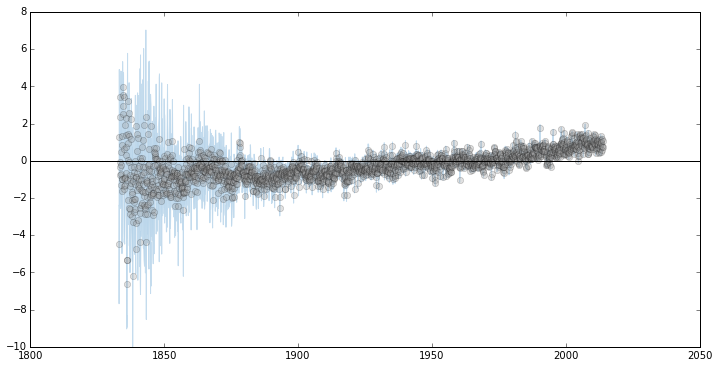

In [27]:
fig = mpl.figure(figsize=[12,6])
mpl.plot(month_since_star,mounthAnomaly, marker="o", ls="None", mfc=mpl.cm.binary(0.4,0.3))
mpl.fill_between(month_since_star,
                 mounthAnomaly+mounthAnomalyUnc,mounthAnomaly-mounthAnomalyUnc,
                 color=mpl.cm.Blues(0.3,0.8))
mpl.axhline(0,ls="-",color="k")

### 3 Create a weighted mean method that will measure the weighted mean and its associated error.


In [29]:
def weighted_mean(data, errors, remove_nan=True, axis=0):
    """ measure the weighted mean of the data
    In this function, the weights will be the inverse of the errors squared.
    The errors measurements assumes a chi2 of 1.
    
    Parameters:
    -----------
    data,errors: [array ; array]
        data-points and their associated errors. They must have the same shape
    
    
    remove_nan: [bool] -optional-
        If true, the nan-values will be masked out. 
    
    axis: [int]
        along which axis do you want to perform the mean measurement
    
    Return
    ------
    float,float (weighted_mean, error_on_weighted_mean)
    """
    if len(data) != len(errors):
        raise ValueError("data and errors must have the same size (given: %d vs %d)"%(len(data),len(errors)))
    
    # -- NaN removal
    if remove_nan:
        flagnan = (data!=data) | (errors!=errors)
        data,errors = data[~flagnan],errors[~flagnan]
    
    # -- Weighted mean
    weights = 1/(errors**2)
    w_mean  = np.sum(weights*data,axis=axis)/np.sum(weights,axis=axis)
    # careful with that since it assumes your errors are perfect...
    var_w_mean  = 1/np.sum(weights,axis=axis)
    
    return w_mean, np.sqrt(var_w_mean)

### 4 Plot the evolution of the temperature base on this weighted mean data. 

In [72]:
np.unique(Year)

array([ 1833.,  1834.,  1835.,  1836.,  1837.,  1838.,  1839.,  1840.,
        1841.,  1842.,  1843.,  1844.,  1845.,  1846.,  1847.,  1848.,
        1849.,  1850.,  1851.,  1852.,  1853.,  1854.,  1855.,  1856.,
        1857.,  1858.,  1859.,  1860.,  1861.,  1862.,  1863.,  1864.,
        1865.,  1866.,  1867.,  1868.,  1869.,  1870.,  1871.,  1872.,
        1873.,  1874.,  1875.,  1876.,  1877.,  1878.,  1879.,  1880.,
        1881.,  1882.,  1883.,  1884.,  1885.,  1886.,  1887.,  1888.,
        1889.,  1890.,  1891.,  1892.,  1893.,  1894.,  1895.,  1896.,
        1897.,  1898.,  1899.,  1900.,  1901.,  1902.,  1903.,  1904.,
        1905.,  1906.,  1907.,  1908.,  1909.,  1910.,  1911.,  1912.,
        1913.,  1914.,  1915.,  1916.,  1917.,  1918.,  1919.,  1920.,
        1921.,  1922.,  1923.,  1924.,  1925.,  1926.,  1927.,  1928.,
        1929.,  1930.,  1931.,  1932.,  1933.,  1934.,  1935.,  1936.,
        1937.,  1938.,  1939.,  1940.,  1941.,  1942.,  1943.,  1944.,
      

In [73]:
unique_years = np.unique(Year)
year_per_ten = unique_years[::10]
print year_per_ten

[ 1833.  1843.  1853.  1863.  1873.  1883.  1893.  1903.  1913.  1923.
  1933.  1943.  1953.  1963.  1973.  1983.  1993.  2003.  2013.]


In [74]:
w_mean, w_mean_err = np.asarray([weighted_mean(mounthAnomaly[(Year>=s) & (Year<e)],mounthAnomalyUnc[(Year>=s) & (Year<e)]) for s,e in zip(year_per_ten[:-1],year_per_ten[1:]) ]).T

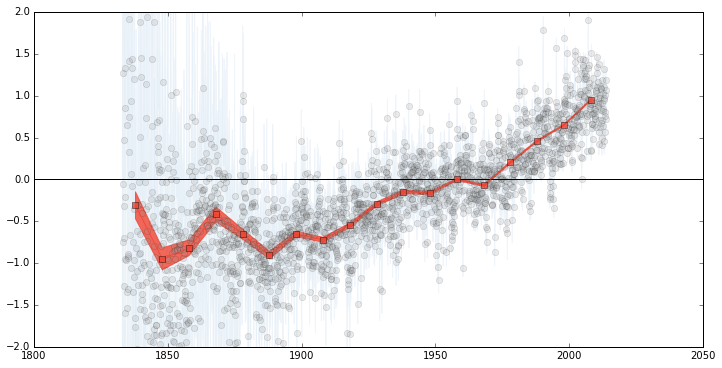

In [64]:
fig = mpl.figure(figsize=[12,6])
# The same plot as before, but more transparent thanks to the 'alpha' option
mpl.plot(month_since_star,mounthAnomaly, marker="o", ls="None", mfc=mpl.cm.binary(0.4,0.3),
        alpha=0.2)
mpl.fill_between(month_since_star,
                 mounthAnomaly+mounthAnomalyUnc,mounthAnomaly-mounthAnomalyUnc,
                 color=mpl.cm.Blues(0.3,0.8), alpha=0.2)
mpl.axhline(0,ls="-",color="k")

# addition of the weighted mean values
year_mid_decade = np.mean([year_per_ten[1:],year_per_ten[:-1]], axis=0)
mpl.plot(year_mid_decade,w_mean, marker="s", color=mpl.cm.Reds(0.6,0.8))
mpl.fill_between(year_mid_decade,
                 w_mean+w_mean_err,w_mean-w_mean_err, color=mpl.cm.Reds(0.6,0.8))
# _ because I do not what matplotlib's return
_ = mpl.ylim(-2,2)

In [ ]:
np.mean